# Aula 5

---

**Saulo Martiello Mastelini**<br>
Candidato a Ph.D. pelo ICMC-USP<br>
Online Machine Learning

Página pessoal: [smastelini](https://smastelini.github.io/)</br>
e-mail: saulomastelini@gmail.com

---

## Sumário:

- Árvores de decisão
- Metodologia de avaliação: Leave-one-out
- Viés e variância: revisitados
- Interpretabilidade: modelos caixa branca e caixa preta
- Visualização de fronteiras de decisão

---

In [54]:
import math
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1. Árvores de decisão

- Geram modelos baseados em árvores de características

# TODO figura

- Os atributos preditivos são particionados de forma hierárquica
- Divisão e conquista
- Geralmente utiliza uma estratégia gulosa (ou _greedy_)
    - A cada passo, seleciona a melhor solução localmente
- Os testes realizados nos atributos vão depender do tipo de dados
    - Divisão binária
    - Divisão n-ária
- Atributos numéricos ou categóricos

# TODO expandir

- As partições buscar deixar os dados mais puros/homogêneos a medida que são criadas as separações
    - Precisamos de medidas que indiquem a pureza dos dados

- Principais medidas de impureza para classificação:
    - Gini
    - Entropia
- Principal medida de homogeneidade para regressão:
    - Variância


$$\text{Entropy}(y) = -\sum_{c=1}^N P\left(\frac{y_c}{y}\right)\log_2\left(\frac{y_c}{y}\right)$$

In [6]:
def entropy(y):
    classes = np.unique(y)

    summ = 0.0
    for c in classes:
        prop = len(y[y == c]) / len(y)

        if prop > 0:
            summ += (prop * math.log2(prop))

    return -summ

In [11]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [13]:
entropy(y)

1.584962500721156

In [14]:
entropy(y[:50])

-0.0

In [16]:
entropy(y[:100])

1.0

In [17]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Vamos tentar uma partição dos dados

In [51]:
# Split binário
sl_x = X[X["sepal length (cm)"] <= 6.3]
sr_x = X[X["sepal length (cm)"] > 6.3]

sl_y = y[X["sepal length (cm)"] <= 6.3]
sr_y = y[X["sepal length (cm)"] > 6.3]

In [52]:
len(sl_x), len(sr_x)

(108, 42)

In [53]:
entropy(sl_y), entropy(sr_y)

(1.486053069017246, 0.8296071030882032)

E se tentassemos uma outra estratégia?

In [34]:
sl_x = X[X["petal length (cm)"] <= 2.45]
sr_x = X[X["petal length (cm)"] > 2.45]

sl_y = y[X["petal length (cm)"] <= 2.45]
sr_y = y[X["petal length (cm)"] > 2.45]

In [49]:
len(sl_x), len(sr_x)

(50, 100)

In [50]:
entropy(sl_y), entropy(sr_y)

(-0.0, 1.0)

- O que faz os valores serem diferentes?

In [38]:
sl_y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [39]:
sr_y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. Escolhendo o melhor atributo para particionar a árvore

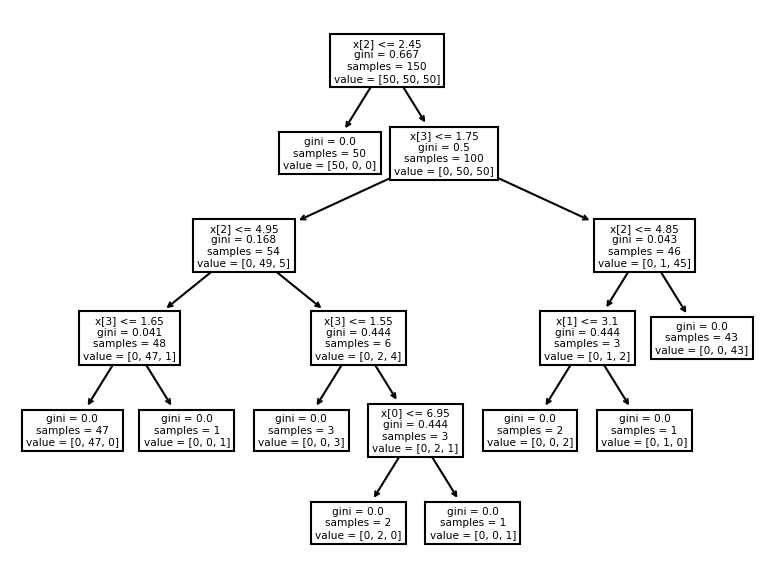

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

plt.figure(dpi=150)
plot_tree(dt)
plt.show()

## 3. Quando parar: poda em árvores de decisão

## 4. Leave-one-out: Explorando os dados ao máximo

## 5. Viés e variância: fronteiras de decisão